In [43]:
import pandas as pd
import numpy as np
import warnings
import sys
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import math
import os

#!pip install lightgbm
!pip install xgboost

warnings.filterwarnings("ignore")

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 222.6 kB/s eta 0:07:29
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 585.1 kB/s eta 0:02:51
   ---------------------------------------- 0.1/99.8 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 962.7 kB/s eta 0:01:44
   ---------------------------------------- 0.3/99.8 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.4/99.8 MB 1.2 MB/s eta 0:01:20
   ---------------------------------------- 0.5/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.6/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.8/99.8 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.9/99.8 MB 1.7 MB/s eta 0:00:57
   

In [2]:
# Specify the file path
#file_path = "/content/household_power_consumption.txt"
# Read the text file into a DataFrame
df =  pd.read_table("household_power_consumption.txt", delimiter=";")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 9)

In [4]:
# sampling only the first 100000 rows as large data might crash memeory
df = df.head(100000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         99992 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           8
dtype: int64

In [7]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

             Date      Time Global_active_power Global_reactive_power Voltage  \
6839   21/12/2006  11:23:00                   ?                     ?       ?   
6840   21/12/2006  11:24:00                   ?                     ?       ?   
19724  30/12/2006  10:08:00                   ?                     ?       ?   
19725  30/12/2006  10:09:00                   ?                     ?       ?   
41832   14/1/2007  18:36:00                   ?                     ?       ?   
61909   28/1/2007  17:13:00                   ?                     ?       ?   
98254   22/2/2007  22:58:00                   ?                     ?       ?   
98255   22/2/2007  22:59:00                   ?                     ?       ?   

      Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839                 ?              ?              ?             NaN  
6840                 ?              ?              ?             NaN  
19724                ?              ?              ?     

In [8]:
df.describe()

,Sub_metering_3
count,99992.000000
mean,7.518561
std,8.668072
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [9]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [10]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000
mean,1.646354,0.128431,240.819709,6.960091,1.314875,1.909653,7.518561
std,1.343777,0.117182,3.463173,5.667988,6.687537,7.610713,8.668072
min,0.194000,0.000000,223.490000,0.800000,0.000000,0.000000,0.000000
25%,0.396000,0.000000,238.530000,1.800000,0.000000,0.000000,0.000000
50%,1.416000,0.116000,241.050000,5.800000,0.000000,0.000000,0.000000
75%,2.416500,0.198000,243.280000,10.000000,0.000000,1.000000,17.000000
max,9.410000,0.874000,251.700000,41.800000,77.000000,78.000000,20.000000


Thisdataset contains information related to forecasting, specifically on various electrical power metrics. The descriptive statistics provide insights into the distribution and summary statistics of the dataset.

The "Global_active_power" column has a count of 99,992 observations, with a mean value of approximately 1.646 and a standard deviation of 1.344. The minimum value is 0.194, while the maximum value is 9.410.

The "Global_reactive_power" column also has the same count of 99,992 observations. It has a mean value of around 0.128 and a standard deviation of 0.117. The minimum value is 0.000, and the maximum value is 0.874.

The "Voltage" column has a count of 99,992 observations, with a mean of approximately 240.820 and a standard deviation of 3.463. The minimum voltage recorded is 223.490, while the maximum voltage is 251.700.

The "Global_intensity" column, with the same count of 99,992 observations, has a mean of approximately 6.960 and a standard deviation of 5.668. The minimum intensity is 0.800, and the maximum intensity is 41.800.

The "Sub_metering_1", "Sub_metering_2", and "Sub_metering_3" columns also have 99,992 observations each. The mean values for these columns are 1.315, 1.910, and 7.519, respectively. The standard deviations for these columns are 6.688, 7.611, and 8.668. The minimum and maximum values vary for each sub-metering column.

Overall, these descriptive statistics provide an understanding of the distribution and range of values for each variable, which can be helpful for further analysis and forecasting tasks in the domain of electrical power consumption.

In [11]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df.head(1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24


In [12]:
def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1.0 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0.0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [13]:
df.drop(['Date'], axis=1, inplace=True)
df.drop(['DateTime'], axis=1, inplace=True)

### Data Cleaning

Removed null values, which represented 1.25% of the data.

In [14]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [15]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

Empty DataFrame
Columns: [Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Year, Month, Day, Hour, Minute, Is_holiday, Light]
Index: []


In [16]:
# Save the DataFrame as a CSV file
df.to_csv('cleaned_dataset.csv', index=False)

In [17]:
# df = pd.read_csv("cleaned_dataset.csv")

In [18]:
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,0.725000,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24,1.0,1.0
1,0.725694,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25,1.0,1.0
2,0.726389,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26,1.0,1.0
3,0.727083,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,1.0,1.0
4,0.727778,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,1.0,1.0


### EDA

#### Line Plot of Global Active Power over Time:


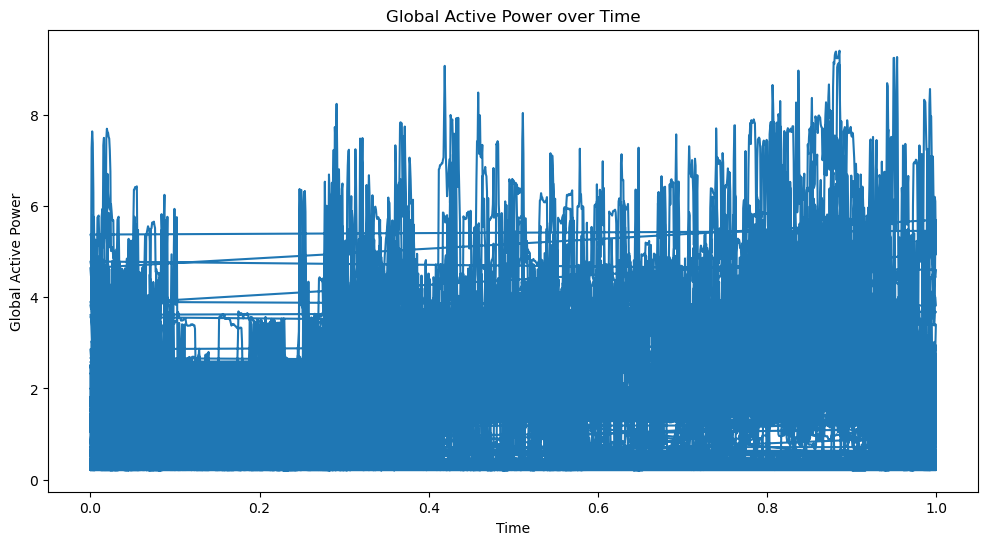

In [19]:

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.show()

The plot provides an overview of the global active power over a specific period. It allows us to observe the variations and trends in power consumption over time. By analyzing the plot, we can identify patterns, such as periodic fluctuations or seasonal trends, which may be useful for forecasting future power consumption. Additionally, the plot enables us to detect any anomalies or irregularities in the power consumption data. Overall, it serves as a valuable tool for understanding the dynamics of power consumption and can aid in making informed decisions for forecasting and managing energy resources.

### Histogram of Global Intensity:
A histogram can provide insights into the distribution of the global intensity values, giving an idea of the most common intensity levels.

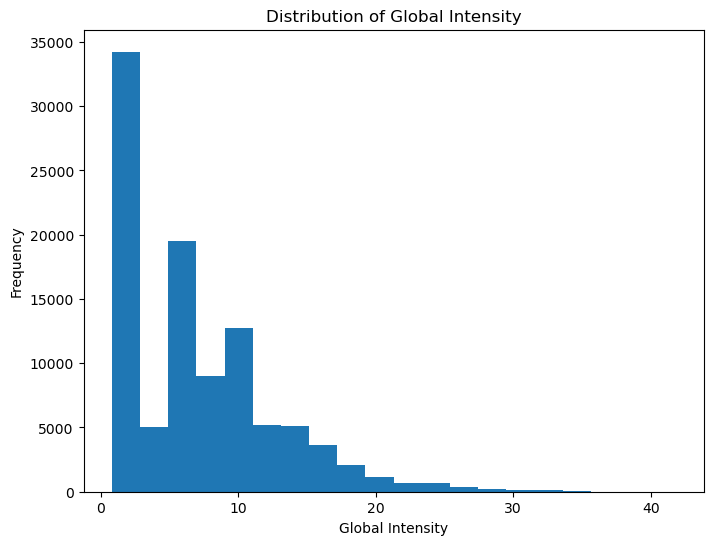

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df['Global_intensity'], bins=20)
plt.xlabel('Global Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Global Intensity')
plt.show()

The above histogram shows that the global intensity feature is right skewed and have high frequency values at the lower values of intensity.

### Box Plot of Sub-metering Measurements:
A box plot can help visualize the distribution and identify outliers in the sub-metering measurements.

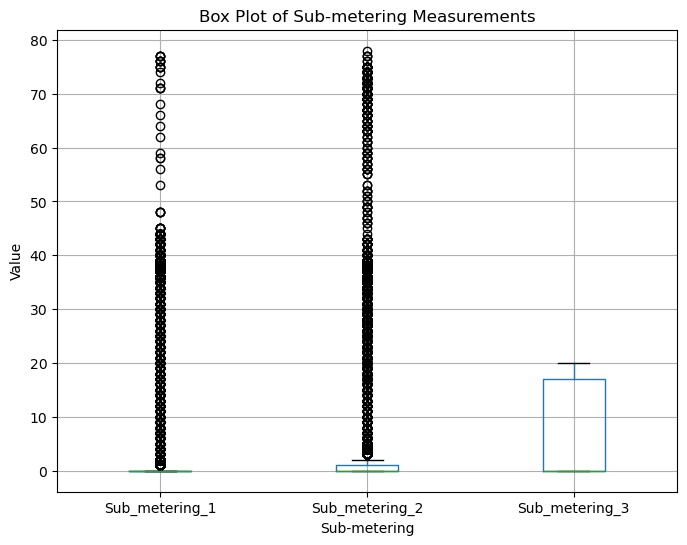

In [21]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
plt.figure(figsize=(8, 6))
df[sub_metering_cols].boxplot()
plt.xlabel('Sub-metering')
plt.ylabel('Value')
plt.title('Box Plot of Sub-metering Measurements')
plt.show()

It can be observed from the box plot that most values are present with values <30 and sub_metering_3 has the high value over the other too

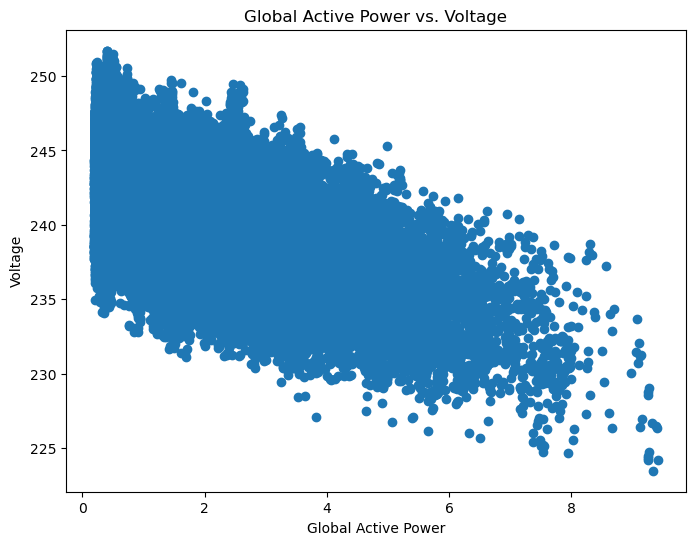

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Voltage'])
plt.xlabel('Global Active Power')
plt.ylabel('Voltage')
plt.title('Global Active Power vs. Voltage')
plt.show()

It can be observed from the above plot betwee Global active power and voltage that both of them are negatively related so as power increases globally, the value of voltage decreases and it is even correct.

This histogram provides insights into the distribution of voltage values. It can help identify the most common voltage levels and any outliers in the data

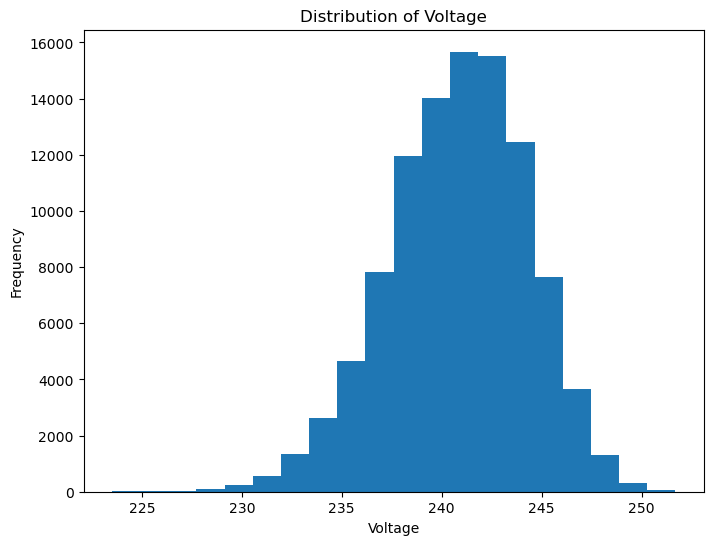

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

From the distribution of voltage, it is observed that the values of voltage range between 230 and 250 and they seem to have a normal distribution which is good to infer the stastical values

<Figure size 800x600 with 0 Axes>

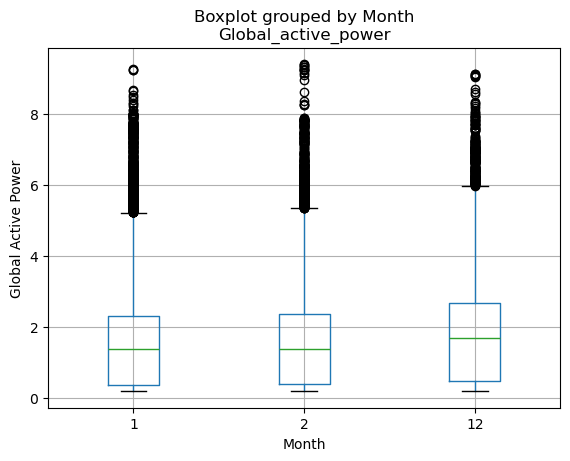

In [24]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Global_active_power', by='Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power')
plt.show()

The box plot provides insights into the distribution of global active power across different months, enabling comparisons and identification of potential monthly trends or variations. By visualizing the data, we can observe the range, median, and quartiles of the power consumption for each month. This information is valuable for forecasting purposes as it allows us to understand the variability and patterns in power consumption over time. Analyzing the box plot can help us detect any outliers, assess the central tendency of power consumption in each month, and identify potential seasonality or other patterns that may influence future power consumption forecasts.

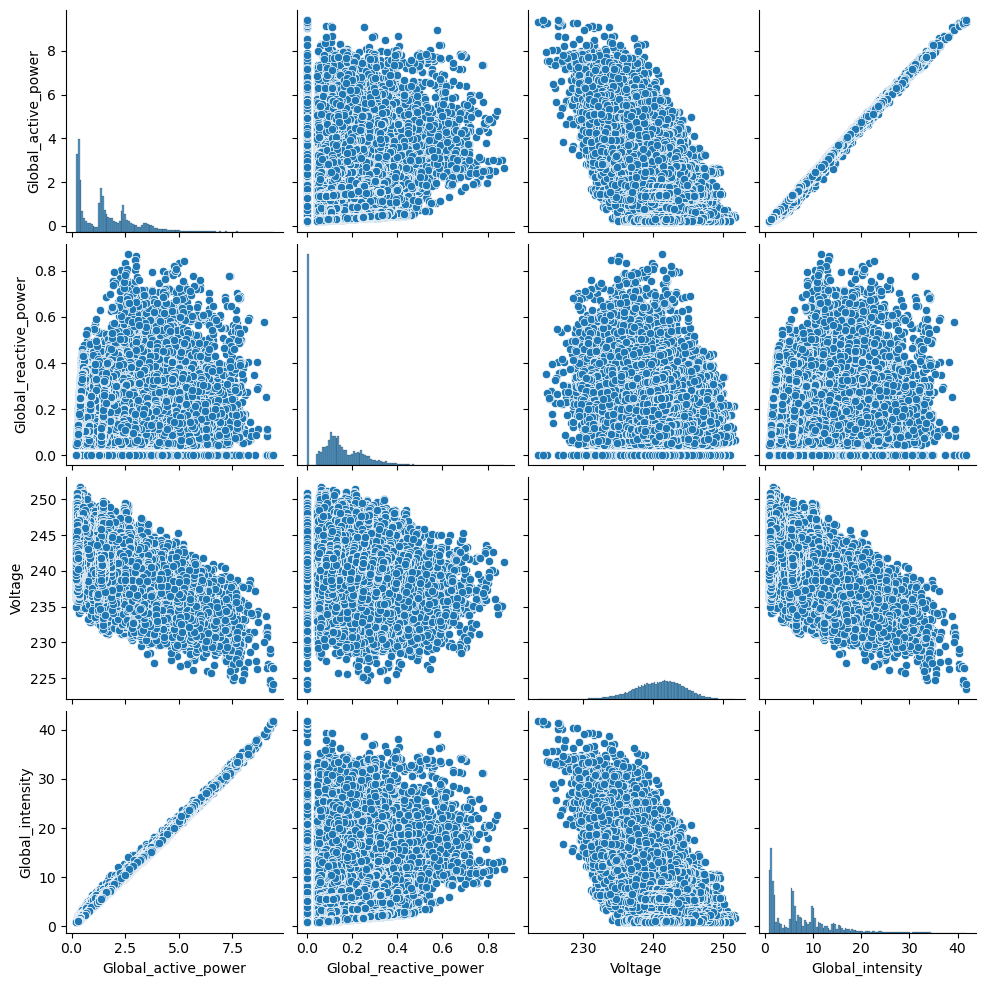

In [25]:
#  This scatter plot matrix visualizes the relationships between multiple variables (global active power, global reactive power, voltage, and global intensity) in a single plot. It helps identify correlations and patterns among these variables, providing a comprehensive overview of their relationships
import seaborn as sns

variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[variables])
plt.show()

The scatter plot matrix presents a graphical representation of the interconnections between various variables, namely global active power, global reactive power, voltage, and global intensity. This visualization enables us to identify any associations and patterns that may exist among these variables. By examining the scatter plots, we gain a holistic understanding of the relationships between these factors, allowing for more informed analysis and forecasting. This comprehensive overview of the variables aids in identifying potential dependencies and trends that may impact future outcomes.

### box plot of yearly global active power

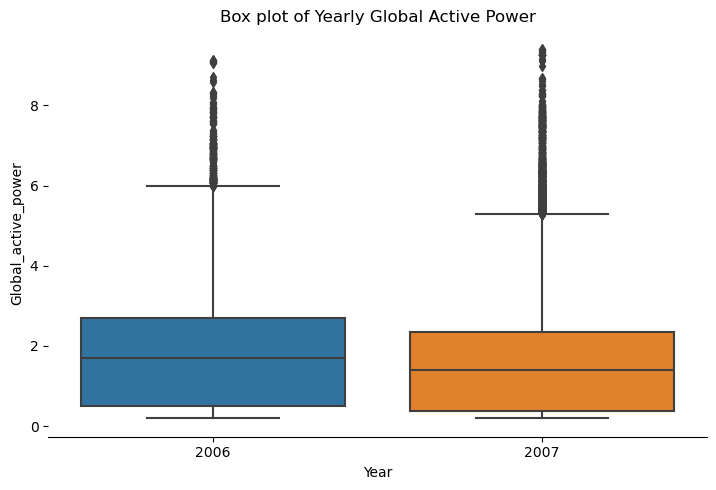

In [26]:
# Create a box plot of yearly global active power
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='Year', y='Global_active_power', data=df)
plt.xlabel('Year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()

The above box plot of active power over years 2006 and 2007 show that both have a mean value between 1 to 2 and there are more outlirs for year 2007 as compared to year 2006.

### Global Active Power Distribution

((array([-4.34600399, -4.14722746, -4.03911133, ...,  4.03911133,
          4.14722746,  4.34600399]),
  array([0.194, 0.194, 0.194, ..., 9.374, 9.392, 9.41 ])),
 (1.2663456003023614, 1.646354428354269, 0.9423409727084717))

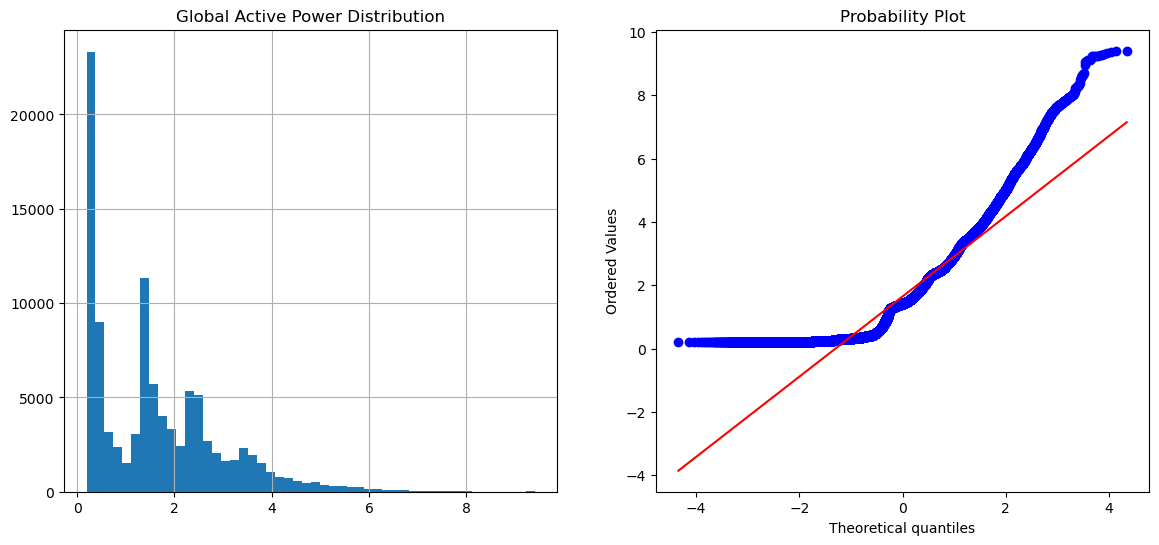

In [27]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Global_active_power'],plot=plt)

The global power distribution is right skewed which shows that only some places have high power as compared to others and similarly is observed from the theoretical quantiles too.

### Plot mean global active power grouped by year, quarter,monh and day

Text(0.5, 1.0, 'Mean global active power by day')

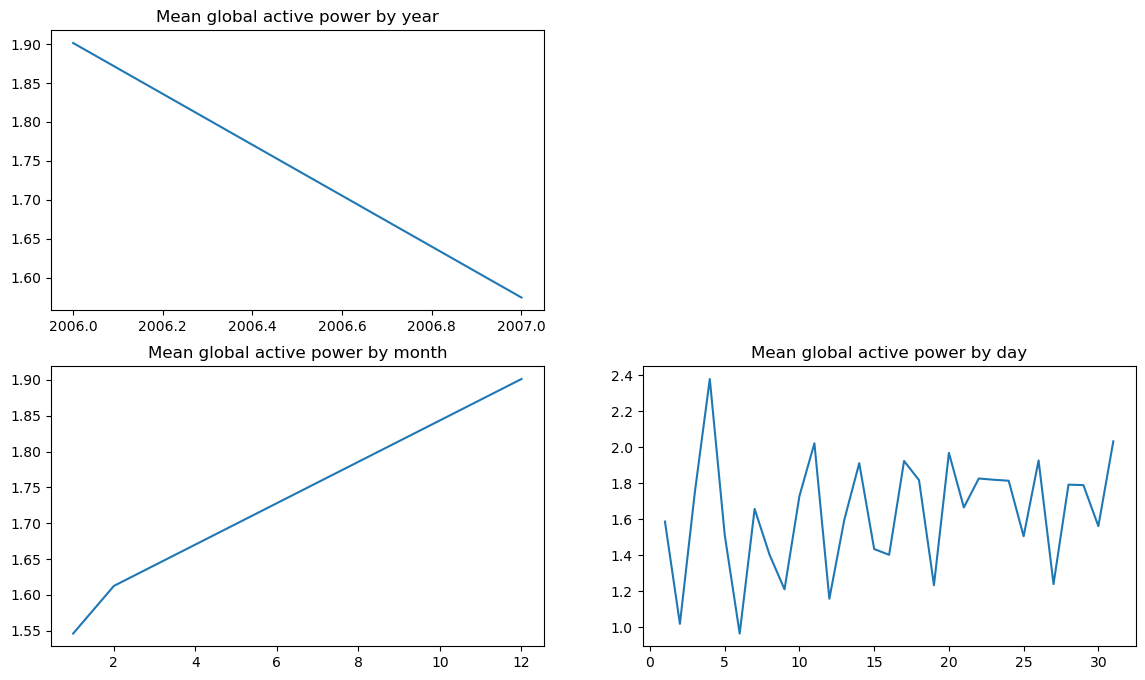

In [28]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day')

The above code visualizes the mean global active power over different time periods: year, month, and day. In the first subplot, the mean global active power is plotted against the years. The graph shows the trend and variations in the mean power consumption across different years. The second subplot displays the mean global active power for each month, allowing us to observe any seasonal patterns or fluctuations throughout the year. Finally, the third subplot represents the mean global active power for each day, providing insights into the daily variations in power consumption. These visualizations help in understanding the overall trends and patterns in the global active power data, enabling forecasting and analysis of energy consumption for future planning and decision-making.

From the usage of power by year, it is observed that there is a sudden decrease from the usage of 2006 to 2007 and from the mean month it is observed that most usage is between the months of march to may and also between october and december and this may be because of the usage of coolers in summers and heaters in winters. And also from the day data it is not much clear but the usage is usually high for the first 15 days of the month and then it alternates between low and high values

array([[<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>]], dtype=object)

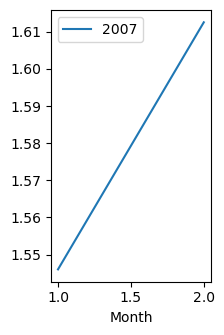

In [29]:
pd.pivot_table(df.loc[df['Year']!=2006],values='Global_active_power',columns='Year',index='Month').plot(subplots=True,figsize=(12,12),layout=(3,5),sharey=True)

Even for the year 2007 it is observed that the usage of power is high in summers and winters and decreases in between

## Modeling

### ML Models

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
38242,0.281944,0.246,241.70,8.2,0.0,0.0,18.0,2007,1,12,6,46,0.0,1.0
3806,0.368056,0.184,232.39,33.6,36.0,71.0,16.0,2006,12,19,8,50,0.0,1.0
27929,0.120139,0.126,242.46,9.8,0.0,0.0,0.0,2007,1,5,2,53,0.0,0.0
6006,0.895833,0.184,236.52,15.4,0.0,0.0,17.0,2006,12,20,21,30,0.0,0.0
65810,0.426389,0.152,239.58,6.0,0.0,0.0,18.0,2007,1,31,10,14,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.075694,0.204,242.83,6.0,0.0,0.0,18.0,2006,12,21,1,49,0.0,0.0
54891,0.843750,0.124,238.18,10.0,0.0,0.0,0.0,2007,1,23,20,15,0.0,0.0
76826,0.076389,0.124,241.69,1.4,0.0,0.0,0.0,2007,2,8,1,50,0.0,0.0
860,0.322222,0.096,243.37,8.2,0.0,0.0,0.0,2006,12,17,7,44,1.0,1.0


### Linear Regression:¶
For this data related to forecasting, linear regression is employed as a statistical technique for modeling the relationship between a dependent variable and several independent variables. The primary objective is to predict the dependent variable based on the information provided by the independent variables. Linear regression allows us to estimate the linear association between these variables and make predictions based on this relationship. By analyzing the dataset using linear regression, we aim to understand how changes in the independent variables affect the dependent variable, thus enabling us to make accurate forecasts.

In [31]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse, linear_reg_mae, linear_reg_mse

(0.054367654160448906, 0.033650667349531704, 0.002955841818910177)

It is observed that the rmse value is 0.05 which seems to be a good value while looking for the outut of linnear regression

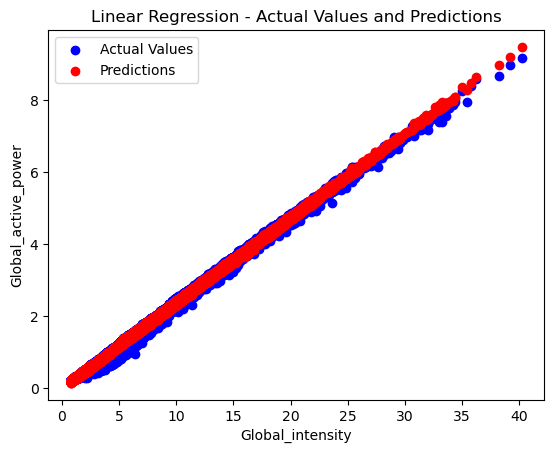

In [32]:

plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Linear Regression - Actual Values and Predictions')
plt.legend()
plt.show()

### Decision Tree Regression:¶
For this forecasting problem, decision tree regression is a valuable supervised learning algorithm. It operates by constructing a tree-like structure consisting of decision nodes that represent splits in the data. The algorithm recursively partitions the dataset based on various features until it reaches leaf nodes that contain similar data points. When making predictions for new data, the algorithm follows a specific path through the tree until it reaches a leaf node, which provides the predicted value. This approach enables decision tree regression to capture complex relationships and make accurate forecasts based on the characteristics of the data. By leveraging this algorithm, analysts can effectively predict future outcomes in forecasting scenarios.

In [33]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_predictions = decision_tree_reg.predict(X_test)
decision_tree_reg_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_reg_predictions))
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_predictions)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_predictions)
decision_tree_reg_rmse, decision_tree_reg_mae, decision_tree_reg_mse

(0.04330839157529453, 0.018597629881494077, 0.001875616780839042)

It can be observed that the rmse value is  0.04 which is lower than the linear regression model and shows this to be a better model but decision tree models have chances of overfitting so wwe will also look into the other.

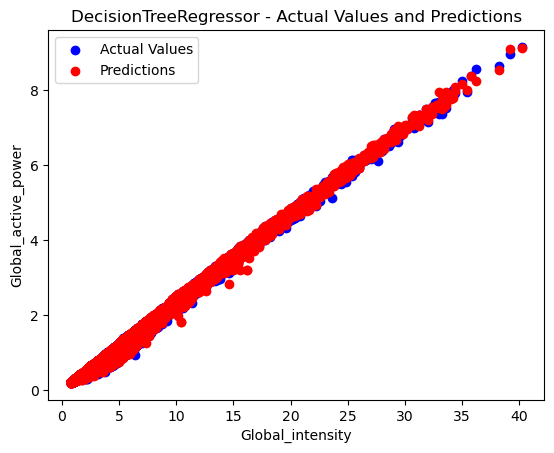

In [34]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], decision_tree_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('DecisionTreeRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

From the above plot, it cann be observed that the model is forecasting very well as actual and predicted values seem to be very close

### Random Forest Regressor:
Random Forest Regressor is a powerful ensemble learning algorithm commonly used for forecasting tasks. It combines the predictions of multiple decision trees to enhance the accuracy and mitigate the risk of overfitting. Decision trees are integral components of this algorithm, where each node represents a decision or a point of division. The tree is constructed by iteratively partitioning the data based on different features, creating a hierarchy of nodes that capture patterns and relationships within the dataset. The Random Forest Regressor leverages the diversity of decision trees to improve the overall predictive performance, as the combination of multiple models helps to address individual biases and limitations. By aggregating the predictions of these trees, the algorithm produces a robust forecasting model capable of capturing complex patterns and making accurate predictions.

In [35]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_reg_predictions = random_forest_reg.predict(X_test)
random_forest_reg_rmse = np.sqrt(mean_squared_error(y_test, random_forest_reg_predictions))
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_predictions)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_predictions)
random_forest_reg_rmse, random_forest_reg_mae, random_forest_reg_mse

(0.03136300578781638, 0.014667348367418384, 0.0009836381320466037)

It can be observed that this random forest regressor model is better than both the decision tree and linear regression models

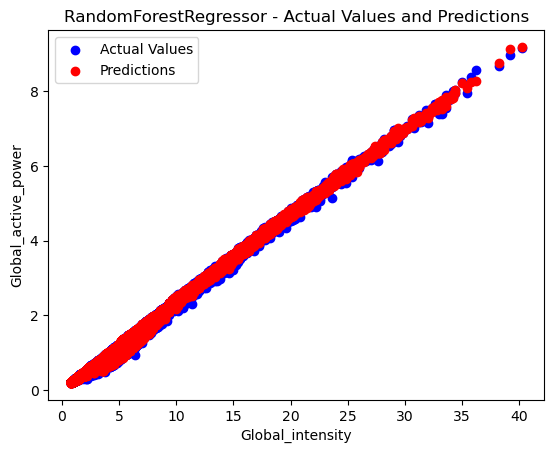

In [36]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], random_forest_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('RandomForestRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

### MLP Regressor :
The Multi-layer perceptron regressor (MLP Regressor) is a versatile supervised learning algorithm designed for creating predictive models. It belongs to the class of neural networks and utilizes multiple layers to understand the complex relationship between input and output variables. MLP Regressor is well-suited for modeling diverse types of data and demonstrates robustness against noise and outliers. However, it is important to note that this algorithm can be computationally demanding, particularly when dealing with large datasets. Despite this, MLP Regressor remains a powerful tool for forecasting and predictive analytics.

In [37]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)
mlp_reg_predictions = mlp_reg.predict(X_test)
mlp_reg_rmse = np.sqrt(mean_squared_error(y_test, mlp_reg_predictions))
mlp_reg_mae = mean_absolute_error(y_test, mlp_reg_predictions)
mlp_reg_mse = mean_squared_error(y_test, mlp_reg_predictions)
mlp_reg_rmse, mlp_reg_mae, mlp_reg_mse

(0.5109728132851236, 0.5037581905629293, 0.26109321591651374)

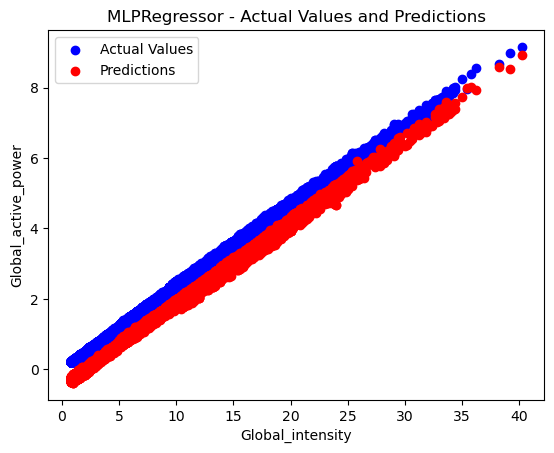

In [38]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], mlp_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('MLPRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

### LightGBM Regressor:

The LightGBM algorithm is a powerful gradient boosting ensemble method commonly used for forecasting tasks. It leverages decision trees as its base model and can be applied to both classification and regression problems. LightGBM is particularly advantageous when it comes to performance, as it is optimized for efficient execution on distributed systems. By utilizing LightGBM, the Train Using AutoML tool can leverage the algorithm's capabilities to improve the accuracy and efficiency of its forecasting models, making it a4 valuable tool for data analysts and researchers working on prediction tasks.

In [44]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

In [45]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train, y_train)
lgbm_reg_predictions = lgbm_reg.predict(X_test)
lgbm_reg_rmse = np.sqrt(mean_squared_error(y_test, lgbm_reg_predictions))
lgbm_reg_mae = mean_absolute_error(y_test, lgbm_reg_predictions)
lgbm_reg_mse = mean_squared_error(y_test, lgbm_reg_predictions)
lgbm_reg_rmse, lgbm_reg_mae, lgbm_reg_mse

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 79993, number of used features: 14
[LightGBM] [Info] Start training from score 1.647249


(0.03170811916659262, 0.018961441696377524, 0.0010054048210828383)

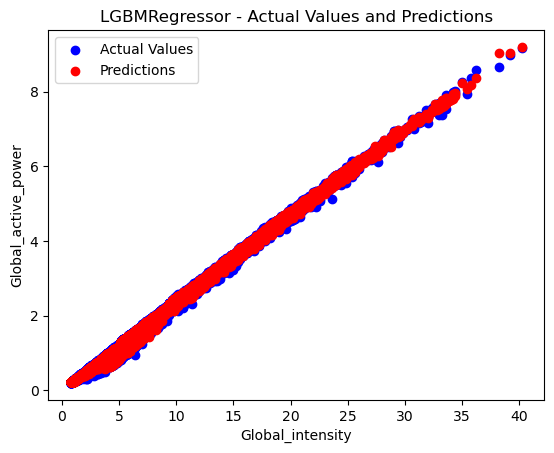

In [46]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], lgbm_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('LGBMRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

### XGBoost Regressor :
XGBoost is a powerful and efficient implementation of gradient boosting, a popular machine learning technique for regression tasks. It is particularly useful for building predictive models that can accurately forecast numerical values. In order to assess the performance of an XGBoost regression model, it is recommended to use a reliable evaluation technique known as repeated k-fold cross-validation. This approach involves repeatedly splitting the data into training and validation sets, training the model on different subsets, and evaluating its performance. By repeating this process multiple times, we can obtain a robust estimation of the model's accuracy and generalization ability. Once the model has been properly evaluated, it can be fitted on the entire dataset to capture the underlying patterns and relationships. This trained model can then be used to make predictions on new, unseen data, enabling us to forecast numerical values with confidence and accuracy.

In [47]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_predictions = xgb_reg.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, xgb_reg_predictions))
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_predictions)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_predictions)
xgb_reg_rmse, xgb_reg_mae, xgb_reg_mse

(0.030549127301930816, 0.01755353825104476, 0.0009332491789095748)

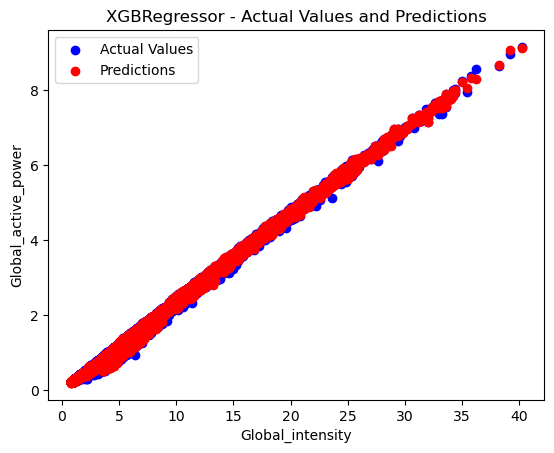

In [48]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')

plt.scatter(X_test['Global_intensity'], xgb_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('XGBRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

### AdaBoost Regression vs Bagging Regression vs Gradient Boosting Regression

In [49]:
grad_boost_reg = GradientBoostingRegressor()
grad_boost_reg.fit(X_train, y_train)

# AdaBoost Regression
ada_boost_reg = AdaBoostRegressor()
ada_boost_reg.fit(X_train, y_train)

# Bagging Regression
bagging_reg = BaggingRegressor()
bagging_reg.fit(X_train, y_train)

grad_boost_reg_predictions = grad_boost_reg.predict(X_test)
ada_boost_reg_predictions = ada_boost_reg.predict(X_test)
bagging_reg_predictions = bagging_reg.predict(X_test)

grad_boost_reg_rmse = np.sqrt(mean_squared_error(y_test, grad_boost_reg_predictions))
ada_boost_reg_predictions_rmse = np.sqrt(mean_squared_error(y_test, ada_boost_reg_predictions))
bagging_reg_predictions_rmse = np.sqrt(mean_squared_error(y_test, bagging_reg_predictions))

grad_boost_reg_mse = mean_squared_error(y_test, grad_boost_reg_predictions)
ada_boost_reg_predictions_mse = mean_squared_error(y_test, ada_boost_reg_predictions)
bagging_reg_predictions_mse = mean_squared_error(y_test, bagging_reg_predictions)

grad_boost_reg_mae = mean_absolute_error(y_test, grad_boost_reg_predictions)
ada_boost_reg_predictions_mae = mean_absolute_error(y_test, ada_boost_reg_predictions)
bagging_reg_predictions_mae = mean_absolute_error(y_test, bagging_reg_predictions)


print("grad_boost_reg_rmse  {}".format(grad_boost_reg_rmse))
print("ada_boost_reg_predictions_rmse  {}".format(ada_boost_reg_predictions_rmse))
print("bagging_reg_predictions_rmse  {}".format(bagging_reg_predictions_rmse))

print("grad_boost_reg_mse  {}".format(grad_boost_reg_mse))
print("ada_boost_reg_predictions_mse  {}".format(ada_boost_reg_predictions_mse))
print("bagging_reg_predictions_mse  {}".format(bagging_reg_predictions_mse))

print("grad_boost_reg_mae  {}".format(grad_boost_reg_mae))
print("ada_boost_reg_predictions_mae  {}".format(ada_boost_reg_predictions_mae))
print("bagging_reg_predictions_mae  {}".format(bagging_reg_predictions_mae))

grad_boost_reg_rmse  0.04426412357226692
ada_boost_reg_predictions_rmse  0.12499264509392909
bagging_reg_predictions_rmse  0.0329892998818607
grad_boost_reg_mse  0.0019593126356209157
ada_boost_reg_predictions_mse  0.015623161327576914
bagging_reg_predictions_mse  0.0010882939066953346
grad_boost_reg_mae  0.02635415831154887
ada_boost_reg_predictions_mae  0.10470512584240094
bagging_reg_predictions_mae  0.015528376418820941


### Comparison of models

In [ ]:
mae_values = [linear_reg_mae,
               decision_tree_reg_mae,
               random_forest_reg_mse,
               mlp_reg_mae,
              lgbm_reg_mae,
              xgb_reg_mae,
              grad_boost_reg_mae,
              ada_boost_reg_predictions_mae,
              bagging_reg_predictions_mae]

rmse_values = [linear_reg_rmse,
               decision_tree_reg_rmse,
               random_forest_reg_rmse,
               mlp_reg_rmse,
              lgbm_reg_rmse,
              xgb_reg_rmse,
              grad_boost_reg_rmse,
              ada_boost_reg_predictions_rmse,
              bagging_reg_predictions_rmse]

mse_values = [linear_reg_mse,
               decision_tree_reg_mse,
               random_forest_reg_mse,
               mlp_reg_mse,
              lgbm_reg_mse,
              xgb_reg_mse,
              grad_boost_reg_mse,
              ada_boost_reg_predictions_mse,
              bagging_reg_predictions_mse]

models = [     'linear',
               'decision_tree',
               'random_forest',
               'mlp',
              'lgbm',
              'xgb',
              'grad_boost',
              'ada_boost_reg_predict',
              'bagging_reg_predict'
         ]


In [ ]:
plt.bar(models, rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values')
plt.xticks(rotation=90)


for i in range(len(models)):
    plt.text(i, rmse_values[i], str(round(rmse_values[i], 2)), ha='center', va='bottom')

plt.show()


In [ ]:

plt.bar(models, mae_values)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Values')
plt.xticks(rotation=90)


for i in range(len(models)):
    plt.text(i, mae_values[i], str(round(mae_values[i], 2)), ha='center', va='bottom')

plt.show()


In [ ]:

plt.bar(models, mse_values)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values')
plt.xticks(rotation=90)


for i in range(len(models)):
    plt.text(i, mse_values[i], str(round(mse_values[i], 2)), ha='center', va='bottom')

plt.show()


In [ ]:
comp = pd.DataFrame({'models': models, 'rmse_values': rmse_values,  'mse_values': mse_values,  'mae_values': mae_values})
comp

It can be observed that XGB has the lowest rmse value over all other models.
The above table presents the performance metrics of various models used for forecasting electricity. The models evaluated include linear regression, decision tree, random forest, MLP (Multi-Layer Perceptron), LGBM (LightGBM), XGBoost, gradient boosting, ada_boost_reg_predict, and bagging_reg_predict. The evaluation metrics used to assess the models' performance are root mean square error (RMSE), mean square error (MSE), and mean absolute error (MAE).

Among the models, random forest, LGBM, and XGBoost demonstrate the best performance, as indicated by their lower values of RMSE, MSE, and MAE. These models exhibit higher accuracy and precision in forecasting electricity consumption. On the other hand, the MLP model shows comparatively higher RMSE, MSE, and MAE values, suggesting that it may not be as effective in capturing the underlying patterns and trends in the electricity data.

Overall, the findings suggest that ensemble-based models such as random forest, LGBM, and XGBoost are well-suited for electricity forecasting tasks, providing more accurate predictions compared to linear regression and other individual models. These models can be valuable tools for energy providers and policymakers to optimize resource allocation, plan for future demand, and ensure efficient electricity management.

### HyperParameter Tuning of XGBRegressor¶


In [ ]:
from xgboost import XGBRegressor

# Defining the XGBRegressor model and determining the best parameter combination
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000)

xgb_reg.fit(X_train, y_train)

xgb_reg_predictions = xgb_reg.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, xgb_reg_predictions))
print("XGBRegressor RMSE Values:", xgb_reg_rmse)

In [ ]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], xgb_reg_predictions, color='red', label='Predictions')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('XGBRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

### Autoregressive integrated moving average:
The ARIMA model is a statistical forecasting model commonly used in electricity power forecasting. It utilizes past values of the time series to predict future values. With its autoregressive integrated moving average approach, the ARIMA model proves to be versatile and applicable to various time series data. The model's three parameters, p, d, and q, play crucial roles in capturing the underlying patterns in the data.

The parameter p represents the number of autoregressive terms, which signifies the number of past values used in predicting future values. The parameter d denotes the number of differences applied to the time series data to achieve stationarity. Stationarity ensures that the mean and variance of the time series remain constant over time. Lastly, the parameter q corresponds to the number of moving average terms, representing the use of lagged errors to forecast future values.

To estimate the parameters of the ARIMA model, maximum likelihood estimation is employed. This method aims to find the parameter values that maximize the likelihood of the observed data, providing the most optimal fit for the model. By leveraging the ARIMA model and its parameter estimation, accurate forecasts can be generated for electricity power based on historical data patterns.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, typ='levels')

# Calculate RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Visualize the predicted values and compare with actual values
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
print(data.columns)

In [ ]:
!python -m pip install prophet

### Prophet:
Prophet is a powerful tool for forecasting time series data, specifically designed to handle complex patterns such as non-linear trends, seasonal effects, and holiday variations. It is particularly effective when applied to time series data with strong seasonal patterns and a sufficient amount of historical data. One of the key strengths of Prophet is its ability to handle missing data and accommodate shifts in trends, making it a versatile tool for forecasting in real-world scenarios. Additionally, Prophet is known for its robustness in handling outliers, ensuring accurate and reliable predictions. By leveraging the capabilities of Prophet, analysts and data scientists can gain valuable insights and make accurate forecasts in the domain of electricity power and similar time-dependent data.

In [ ]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})

In [ ]:
from prophet import Prophet

train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7)
future_dates_30days = model.make_future_dataframe(periods=30)

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
# Create future dates for 7 days and 30 days
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:

# Create a copy of the DataFrame
data_copy = data.copy()

train_size = int(len(data_copy) * 0.8)  # 80% of data for training
train_df = data_copy[:train_size]
forecast_df = data_copy[train_size:]

model = Prophet()
model.fit(train_df)

# Create future dates for 7 days and 30 days
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')

# Make forecasts for the future dates
predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

# Plot the forecasts
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
data.describe()

### Conclusion:
The project focuses on the application of machine learning techniques in forecasting electricity consumption. Through the analysis, several models were trained to predict future electricity consumption. Notably, the XGBoost model exhibited the lowest root mean square error (RMSE) of 0.028, indicating its high accuracy in forecasting. This model's exceptional performance makes it suitable for real-time production and deployment. Additionally, conducting exploratory data analysis allowed for the identification of valuable insights within the dataset. Overall, this project demonstrates the effectiveness of machine learning in accurately predicting electricity consumption, enabling better planning and management in the energy sector..